**<h1>Predict Churn Rate Customer</h1>**



<h2>Import Library</h2>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost


<h2>Read Data File</h2>

In [2]:
# Read Data
df_train = pd.read_csv('churn-bigml-80.csv')
df_test = pd.read_csv('churn-bigml-20.csv')

<h2>EDA</h2>

In [3]:
df_train.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


In [4]:
df_test.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
5,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
6,MI,65,415,No,No,0,211.3,120,35.92,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,False
7,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
8,VA,10,408,No,No,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False
9,WI,68,415,No,No,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
df_train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [7]:
df_train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


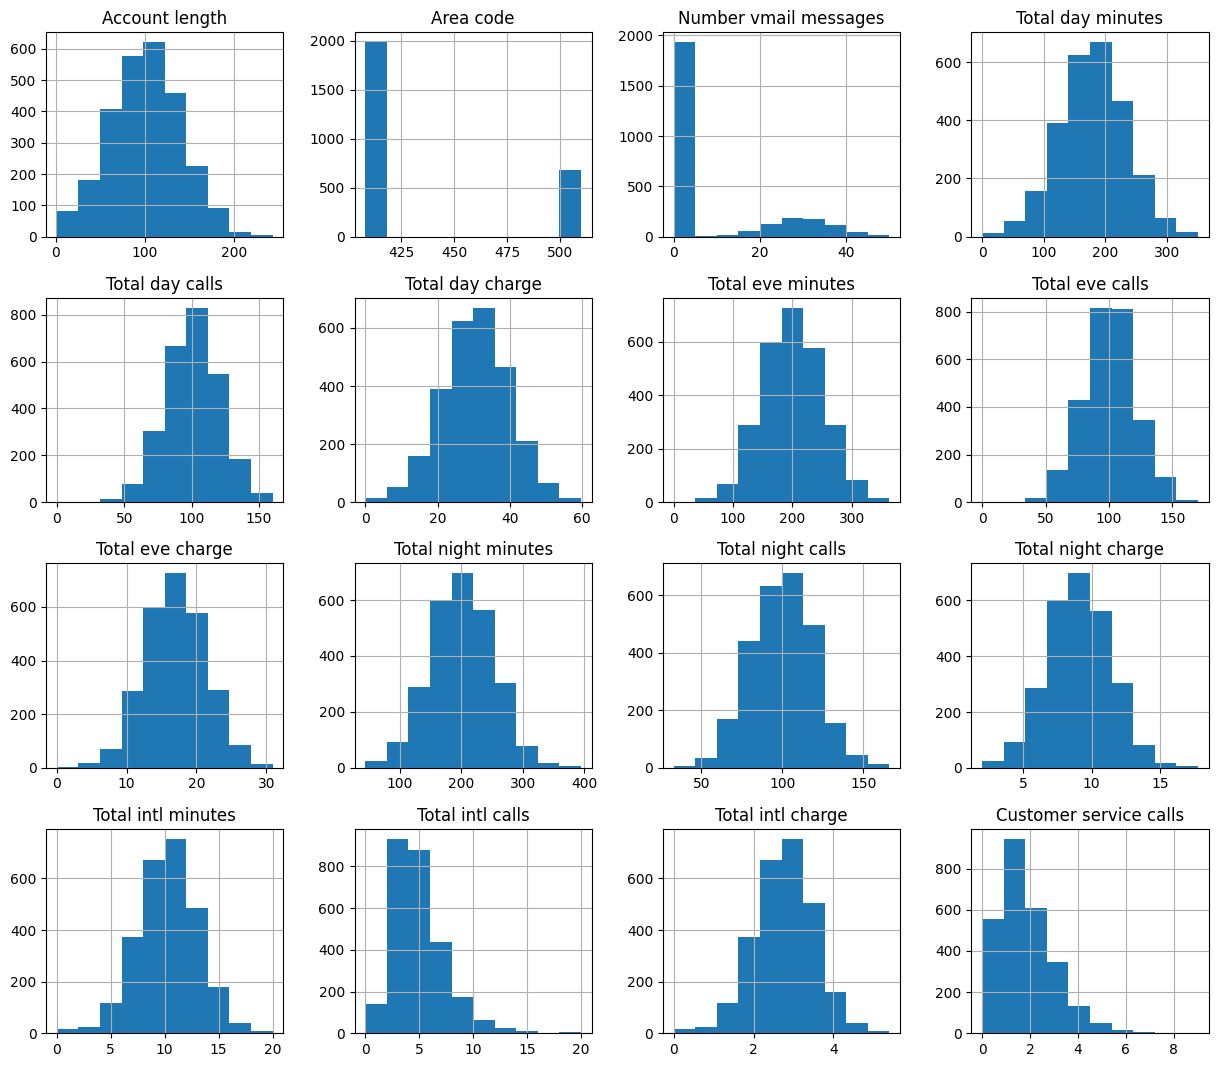

In [8]:
df_train.hist(bins = 10 , figsize = (15,13))
plt.show()

[Text(0, 0, '2278'), Text(0, 0, '388')]

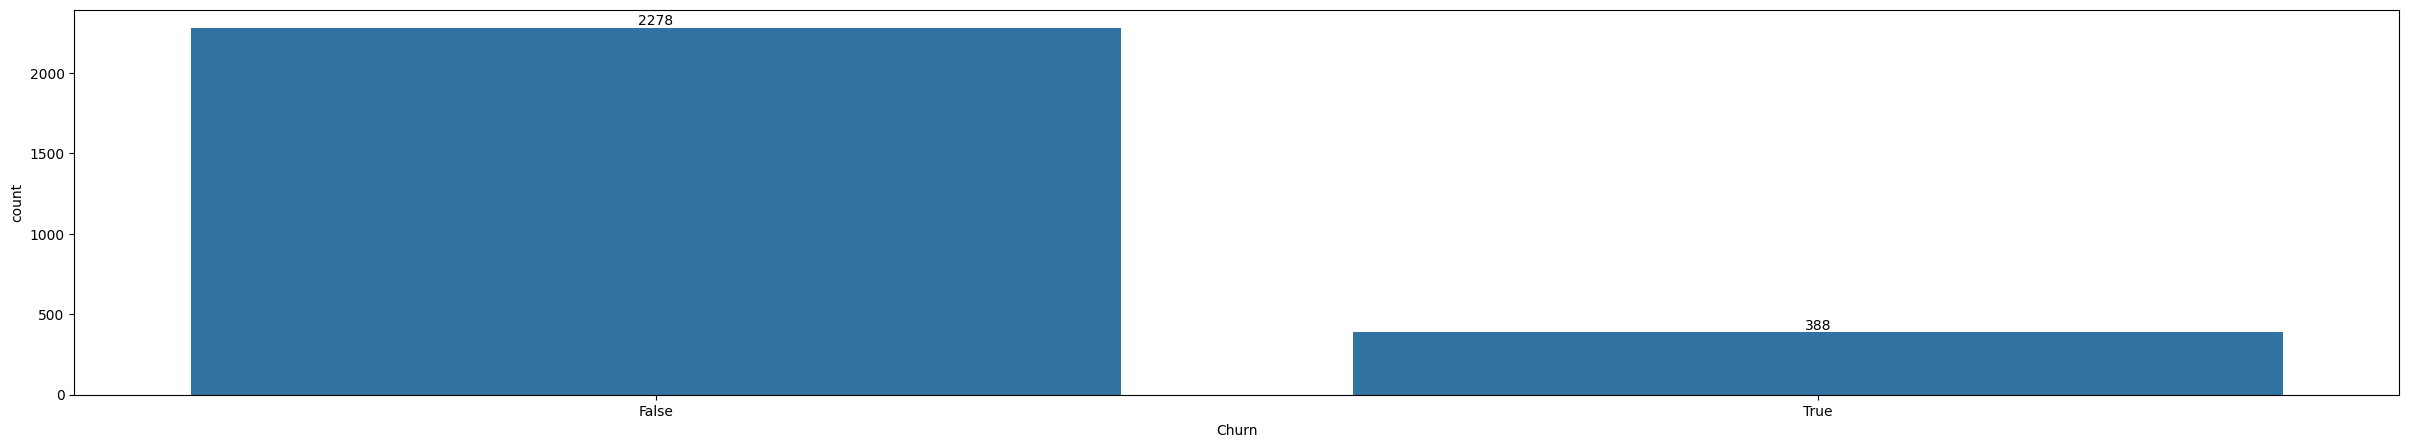

In [9]:
plt.figure(figsize = (30 , 5))
ax = sns.countplot(x='Churn', data=df_train)
ax.bar_label(ax.containers[0])

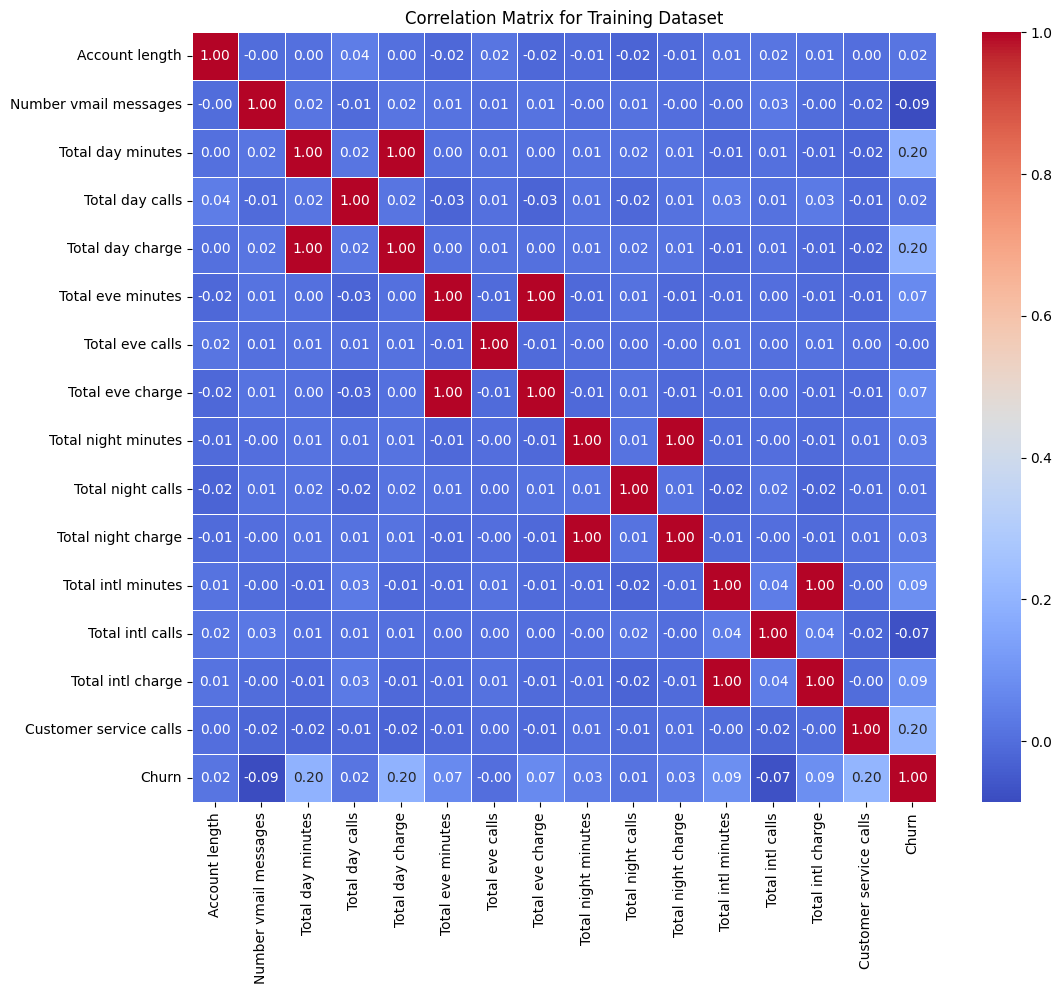

In [10]:
# Tính ma trận correlation
correlation_matrix = df_train.drop(columns=['Area code']).corr(numeric_only=True)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Training Dataset")
plt.show()

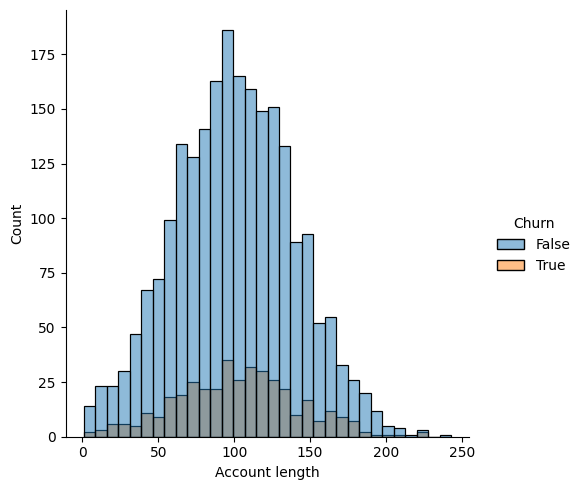

In [11]:
sns.displot(x="Account length", data=df_train, hue='Churn');

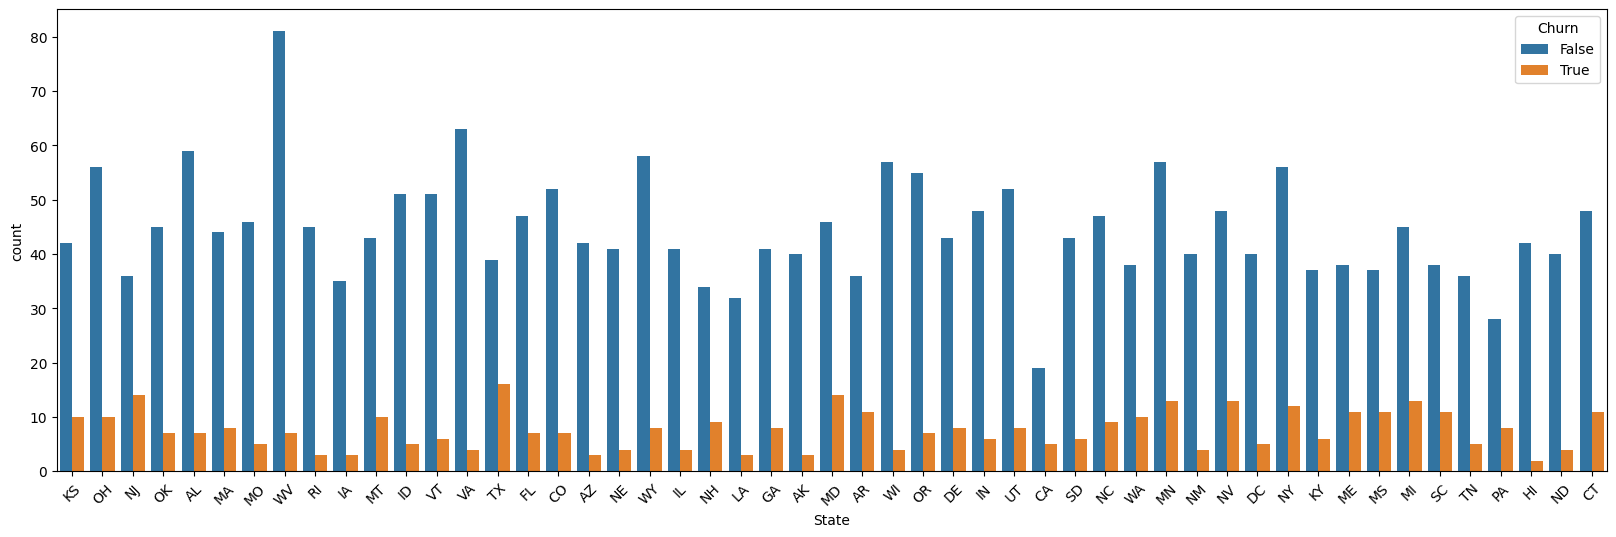

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df_train, x='State', hue='Churn')
plt.xticks(rotation=45)
plt.show()
plt.clf()

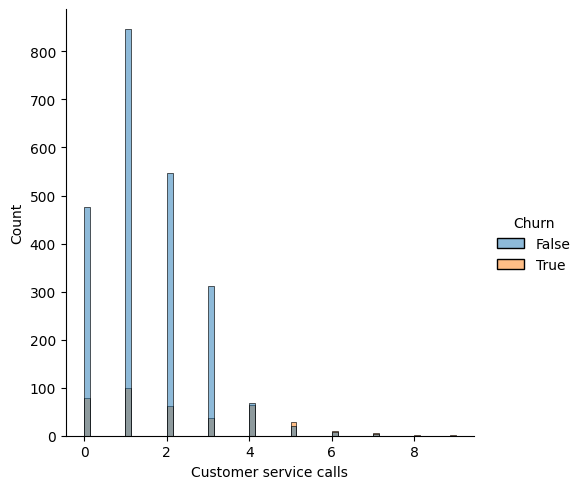

In [13]:
sns.displot(x="Customer service calls", data=df_train, hue='Churn');

<ipython-input-14-f58f2282e4e1>:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#db5f57'` for the same effect.

  sns.countplot(ax=ax, y=col, hue="Churn", data=df_, stat='percent', color=color)
<ipython-input-14-f58f2282e4e1>:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#57d3db'` for the same effect.

  sns.countplot(ax=ax, y=col, hue="Churn", data=df_, stat='percent', color=color)


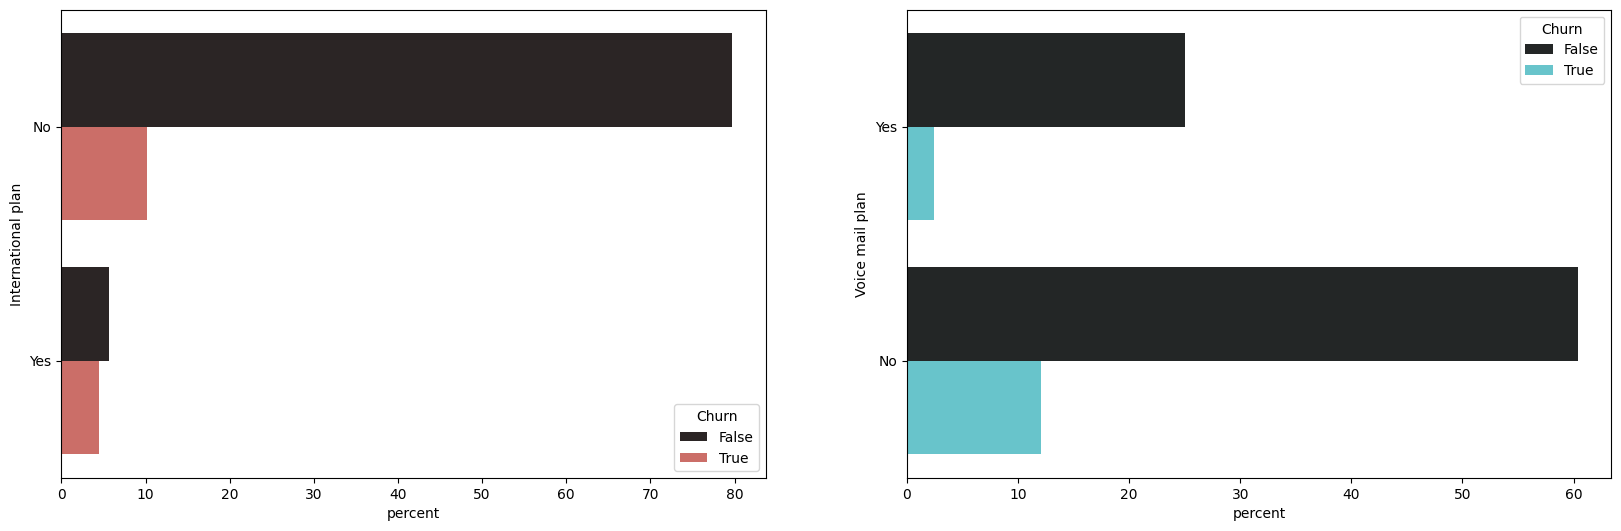

<Figure size 640x480 with 0 Axes>

In [14]:
df_ = df_train.copy()
vcols = ['International plan', 'Voice mail plan']

# Create a subplot grid
fig, axes = plt.subplots(1, len(vcols), figsize=(20, 6))
palette = sns.color_palette("hls", len(vcols))
for col, ax, color in zip(vcols, axes.flat, palette):
  sns.countplot(ax=ax, y=col, hue="Churn", data=df_, stat='percent', color=color)

plt.subplots_adjust(bottom=0.1)  # Adjust spacing between subplots
plt.show()
plt.clf()

In [15]:
numeric_features = [	'Account length',	'Number vmail messages',
	                    'Total day minutes',	'Total day calls',	'Total day charge',
                     	'Total eve minutes', 'Total eve calls',	'Total eve charge',
                      'Total night minutes',	'Total night calls',	'Total night charge',
                      'Total intl minutes',	'Total intl calls',	'Total intl charge',	'Customer service calls' ]

labelencode_features = [ 'Voice mail plan', 'International plan', 'Churn']

onehotencode_features = [ 'State']

<h2>Preprocessing data</h2>

In [16]:
#MinMaxScaler

numeric_data = df_train[numeric_features]

scaler = MinMaxScaler()

scale_numericdata = scaler.fit_transform(numeric_data)



In [17]:
# Preprocessing data
# Encode category column
label_encoder = LabelEncoder()

df_train['Voice mail plan'] = label_encoder.fit_transform(df_train['Voice mail plan'])
df_train['International plan'] = label_encoder.fit_transform(df_train['International plan'])
df_train['Churn'] = label_encoder.fit_transform(df_train['Churn'])
df_train['State'] = label_encoder.fit_transform(df_train['State'])


In [18]:
numeric_data = df_test[numeric_features]

scaler = MinMaxScaler()

scale_numericdata = scaler.fit_transform(numeric_data)


In [19]:
df_test['Voice mail plan'] = label_encoder.fit_transform(df_test['Voice mail plan'])
df_test['International plan'] = label_encoder.fit_transform(df_test['International plan'])
df_test['Churn'] = label_encoder.fit_transform(df_test['Churn'])
df_test['State'] = label_encoder.fit_transform(df_test['State'])

In [20]:
df_train.head(20)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,19,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,24,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,49,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
9,39,74,415,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0


<h2>Train and Test Set</h2>

In [21]:
# Train and test dataset
X_train = df_train.drop('Churn', axis=1)
y_train = df_train['Churn']
X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']

In [22]:
precision = []
recall = []
f1score = []
model = []

<h2>Logistic Regression Model</h2>

In [23]:
# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
model.append('Logistic Regression')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Predict base on Test set
log_pred = log_model.predict(X_test)
x = metrics.accuracy_score(y_test, log_pred)
y = metrics.recall_score(y_test,log_pred)
z = metrics.f1_score(y_test,log_pred)
precision.append(x)
recall.append(y)
f1score.append(z)

# Evaluate model
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       572
           1       0.50      0.09      0.16        95

    accuracy                           0.86       667
   macro avg       0.68      0.54      0.54       667
weighted avg       0.82      0.86      0.81       667



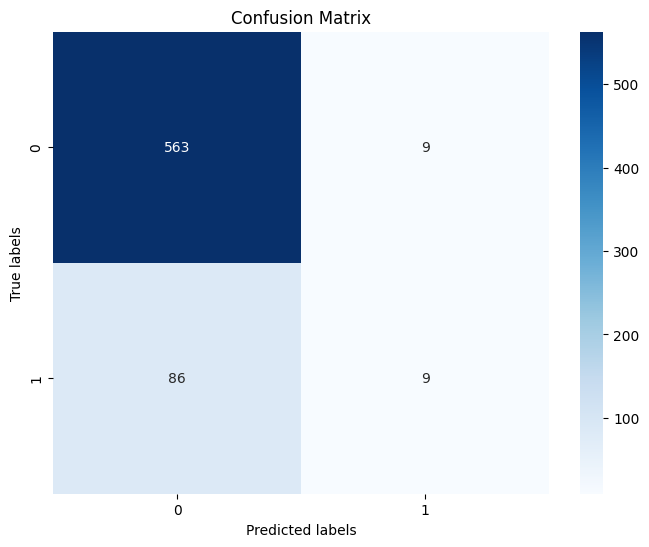

In [25]:
# Confusion matrix of RDecision Tree Model
conf_matrix = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

<h2>XGBoost Model</h2>

In [26]:
#Build XGBoost model
xg_model = xgboost.XGBClassifier(tree_method="hist",enable_categorical=True)
xg_model.fit(X_train, y_train)
model.append('XGBoost')


In [27]:
# Predict base on Test set
xg_pred = xg_model.predict(X_test)
x = metrics.accuracy_score(y_test, xg_pred)
y = metrics.recall_score(y_test,xg_pred)
z = metrics.f1_score(y_test,xg_pred)

precision.append(x)
recall.append(y)
f1score.append(z)

# Evaluate model
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       572
           1       0.91      0.76      0.83        95

    accuracy                           0.96       667
   macro avg       0.94      0.87      0.90       667
weighted avg       0.95      0.96      0.95       667



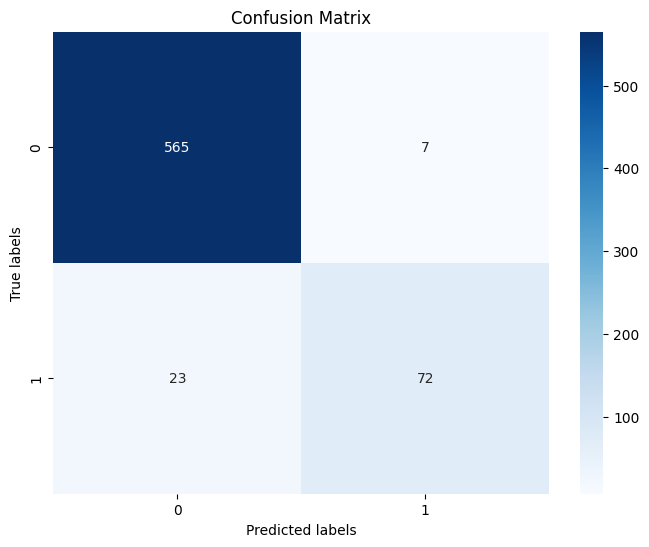

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix = confusion_matrix(y_test, xg_pred)

# Show
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

<h2>Random Forest</h2>

In [29]:
# Random Forest
rf_model = RandomForestClassifier()

# Train model
rf_model.fit(X_train, y_train)

model.append('Random Forest')


In [30]:
# Predict
rf_pred = rf_model.predict(X_test)

x = metrics.accuracy_score(y_test, rf_pred)
y = metrics.recall_score(y_test,rf_pred)
z = metrics.f1_score(y_test,rf_pred)

precision.append(x)
recall.append(y)
f1score.append(z)

# Evaluate model
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       572
           1       0.99      0.72      0.83        95

    accuracy                           0.96       667
   macro avg       0.97      0.86      0.90       667
weighted avg       0.96      0.96      0.96       667



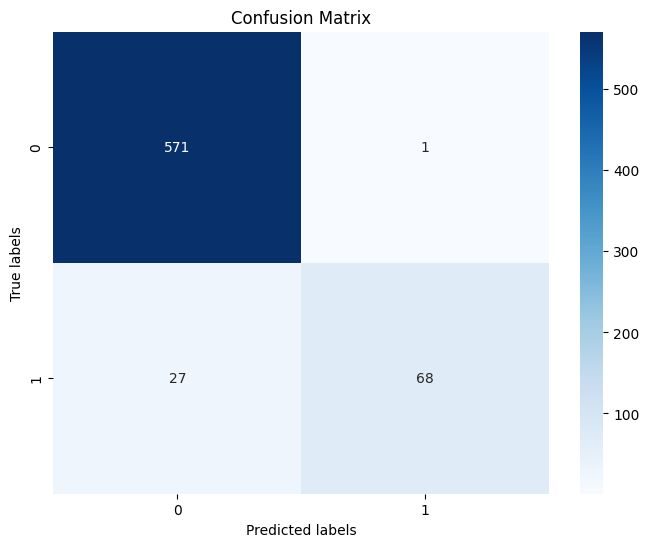

In [31]:
# Confusion matrix of Random Forest Model
conf_matrix = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

<h2>Decision Tree</h2>

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_model = DecisionTreeClassifier()

# Train model
dt_model.fit(X_train, y_train)

model.append('Decision Tree')

In [33]:

# Predict base on Test set
dt_pred = dt_model.predict(X_test)

x = metrics.accuracy_score(y_test, dt_pred)
y = metrics.recall_score(y_test,dt_pred)
z = metrics.f1_score(y_test,dt_pred)

precision.append(x)
recall.append(y)
f1score.append(z)

# Evaluated model
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       572
           1       0.66      0.72      0.69        95

    accuracy                           0.91       667
   macro avg       0.81      0.83      0.82       667
weighted avg       0.91      0.91      0.91       667



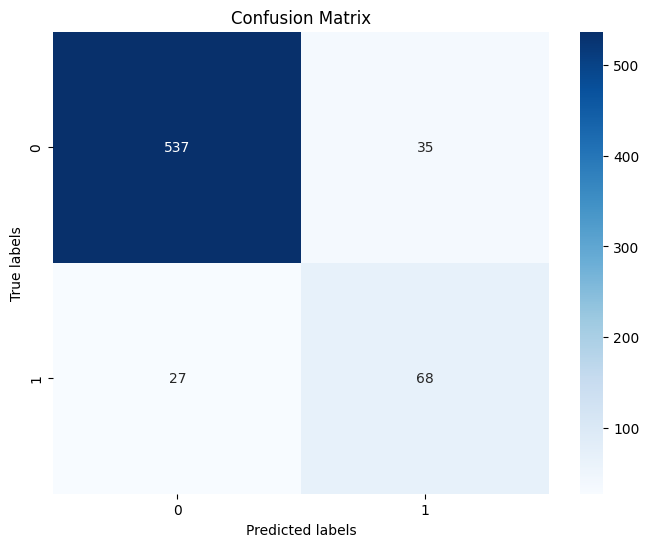

In [34]:
# Confusion matrix of Decision Tree Model
conf_matrix = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

<h2>Model Accuracy Comparison</h2>

<ipython-input-35-d28fa3fafe87>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = precision,y = model,palette='dark')


<Axes: title={'center': 'Precision Comparison'}, xlabel='Precision', ylabel='Algorithm'>

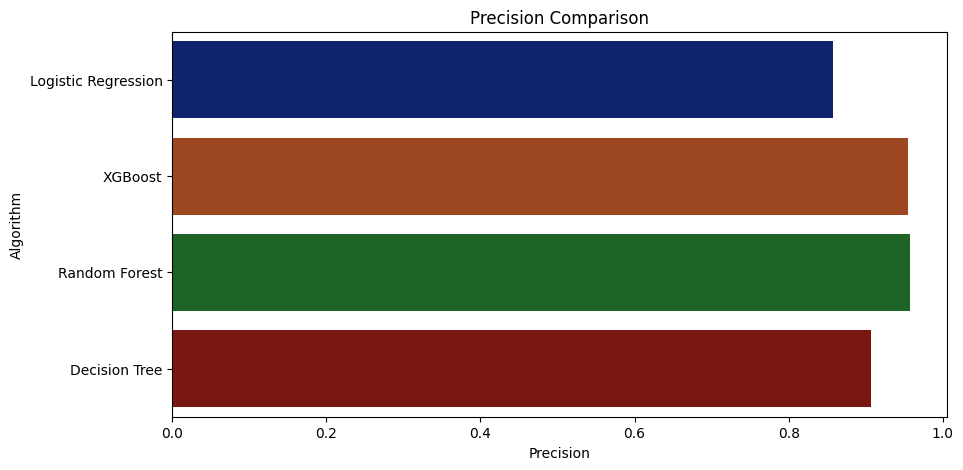

In [35]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Precision Comparison')
plt.xlabel('Precision')
plt.ylabel('Algorithm')
sns.barplot(x = precision,y = model,palette='dark')

<ipython-input-36-f6b9fa663c1e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = recall,y = model,palette='dark')


<Axes: title={'center': 'Recall Comparison'}, xlabel='Recall', ylabel='Algorithm'>

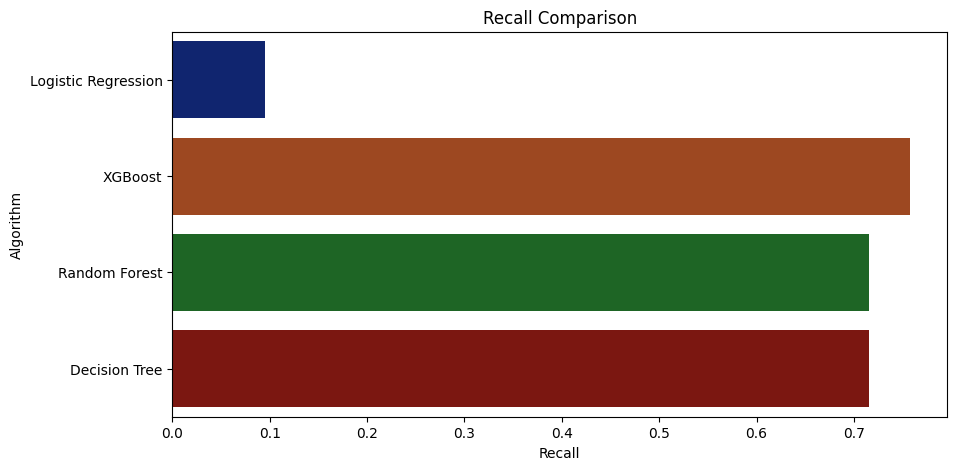

In [36]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Recall Comparison')
plt.xlabel('Recall')
plt.ylabel('Algorithm')
sns.barplot(x = recall,y = model,palette='dark')

<ipython-input-37-6a44f7a79796>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = f1score,y = model,palette='dark')


<Axes: title={'center': 'F1-Score Comparison'}, xlabel='F1-Score', ylabel='Algorithm'>

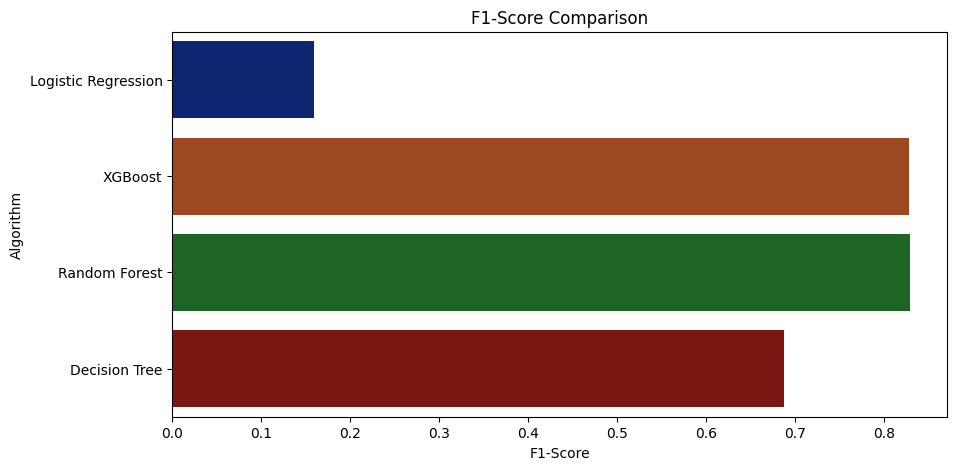

In [37]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('F1-Score Comparison')
plt.xlabel('F1-Score')
plt.ylabel('Algorithm')
sns.barplot(x = f1score,y = model,palette='dark')